# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

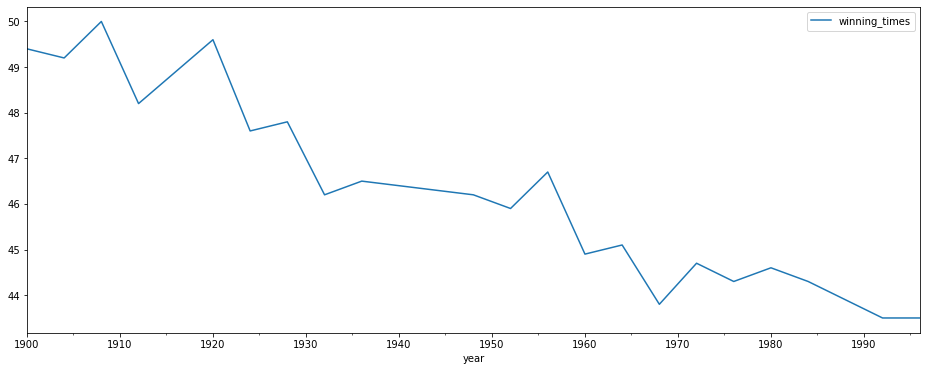

In [3]:
data.plot(figsize = (16,6));

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

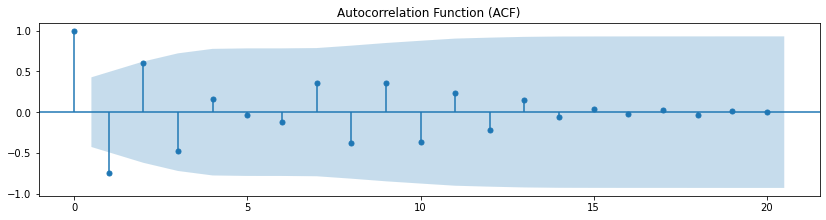

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot the ACF

plt.figure(figsize=(14, 7))

plt.subplot(211)
plot_acf(data_diff, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function (ACF)')

c:\Users\willi\anaconda3\envs\learn-env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


Text(0.5, 1.0, 'Partial Autocorrelation Function (PACF)')

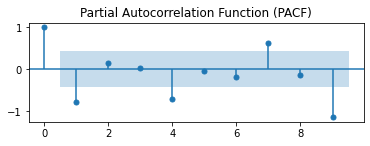

In [10]:
# Plot the PACF
# Calculate a valid number of lags (less than 50% of the sample size)
num_lags = len(data_diff) // 2 - 1


plt.subplot(212)
plot_pacf(data_diff, ax=plt.gca(), lags=num_lags)
plt.title('Partial Autocorrelation Function (PACF)')



Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [11]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARMA model
model = ARIMA(data, order=(1, 0, 1))
results = model.fit()


In [12]:
# Print the summary
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   22
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -29.390
Date:                Mon, 24 Jun 2024   AIC                             66.780
Time:                        22:37:24   BIC                             71.144
Sample:                    12-31-1900   HQIC                            67.808
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3916      2.448     18.948      0.000      41.593      51.190
ar.L1          0.9723      0.080     12.223      0.000       0.816       1.128
ma.L1         -0.3045      0.286     -1.066      0.2

In [13]:
# Check AIC and BIC values
print(f"AIC: {results.aic}")
print(f"BIC: {results.bic}")

AIC: 66.77963263425123
BIC: 71.1438024476845


## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 